In [1]:
import os
os.chdir("../")

In [2]:
from hebe.active_learning.simulation import active_learning_simulation
from hebe.nn_models import SSVAE
from hebe.config import Config

from sklearn.datasets import make_moons
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from hebe.datasets_utils import (
    create_chess_deck_data,
    create_moons_data,
    extend_training_data,
    plot_data_uncertainty_grid,
    simulate_grid,
)
import torch
from hebe.active_learning.simulation import create_train_dataloader

In [3]:
config = Config()

In [4]:
model = SSVAE(
    config.nn_parameters,
    config.active_learning,
    config.vae
)

X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
# x_train, y_train, x_test, y_test = create_chess_deck_data()

labeled_dataloader = create_train_dataloader(x_train, y_train)
unlabeled_dataloader = create_train_dataloader(x_train)
model.train(labeled_dataloader, unlabeled_dataloader)

First loss: 5.236766815185547
Last loss: 2.957170605659485


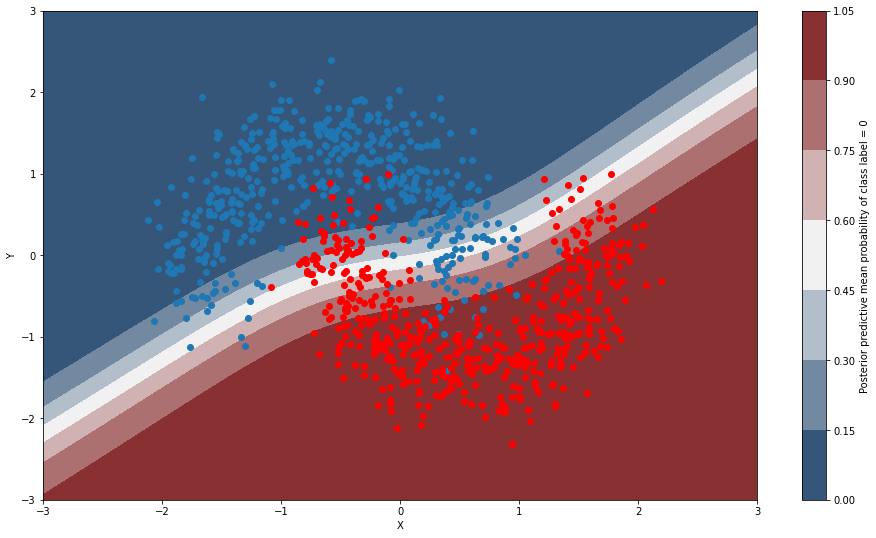

In [5]:
grid, nn_input_grid = simulate_grid()
predictions = model.predict(nn_input_grid)
plot_data_uncertainty_grid(
                predictions,
                None,
                grid,
                x_train,
                y_train,
                x_test,
                y_test,
            )